In [ ]:
# Step-1: Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step-2: load the data file 

In [10]:
df = pd.read_csv('D:/Abhishek Sahani/Projects/Data Analytics with python Projects/zomato data analysis/Zomato data .csv')
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
# Removing /5 from rate column

In [14]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)

In [16]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [20]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [ ]:
# Type of restaurents

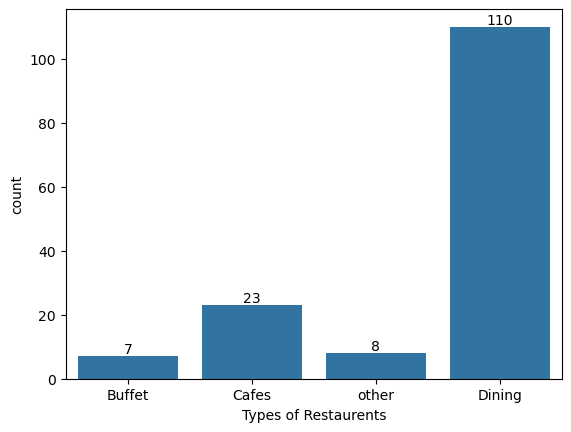

In [38]:
#sns.countplot(x = df['listed_in(type)'])
ax = sns.countplot(data=df, x = 'listed_in(type)')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Types of Restaurents')
plt.show()

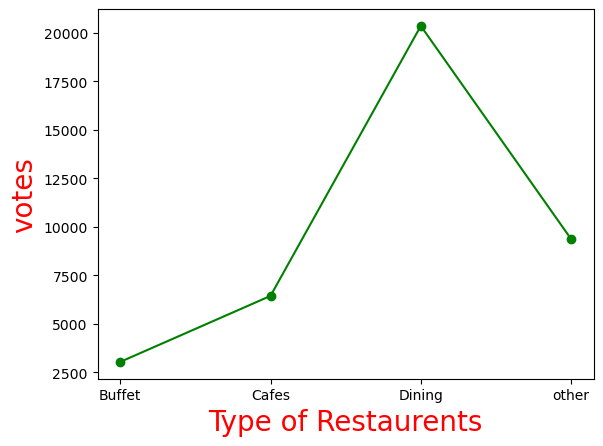

In [48]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of Restaurents', c='red', size=20)
plt.ylabel('votes', c='red', size=20)
plt.show()

In [ ]:
# Conclusion: Dining restaurents has recieved maximum votes.

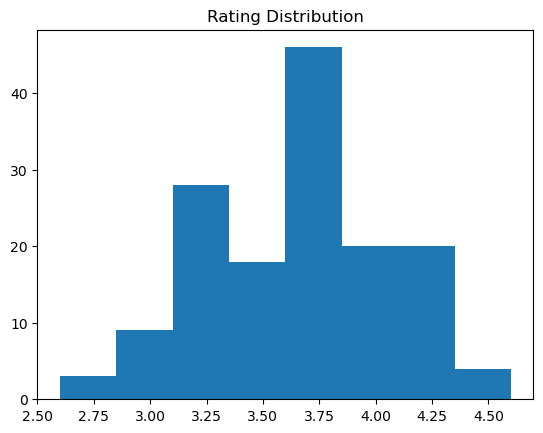

In [54]:
plt.hist(df['rate'], bins = 8)
plt.title('Rating Distribution')
plt.show()

In [ ]:
# Conclusion: The majority restaurents recieved ratings from 3.5 to 4

In [62]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

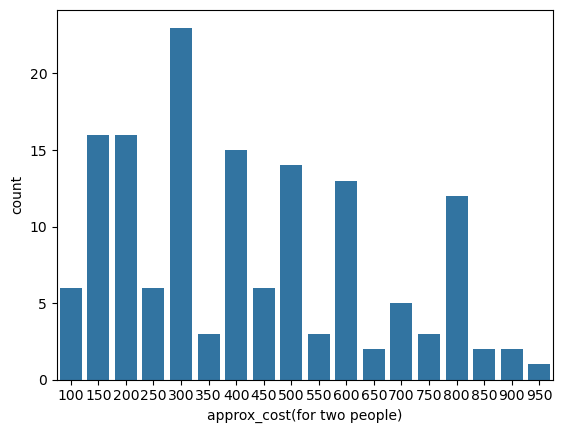

In [76]:
average_couple_spending = df['approx_cost(for two people)']
sns.countplot(x = average_couple_spending)
plt.show()

In [ ]:
# Conclusion: The majority of the couples prefer restaurenst with an approximate cost of 300

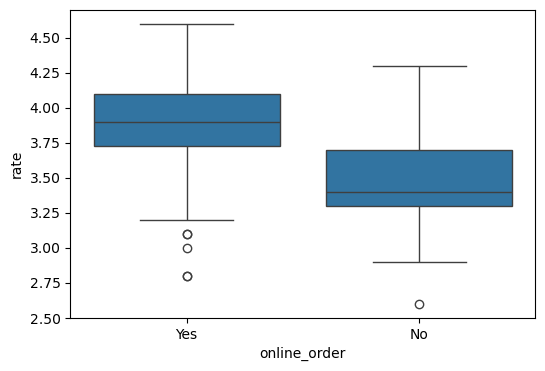

In [82]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'online_order', y = 'rate', data = df)
plt.show()

In [ ]:
# Conclusion: offline order recieved lower rating comparison to online rating

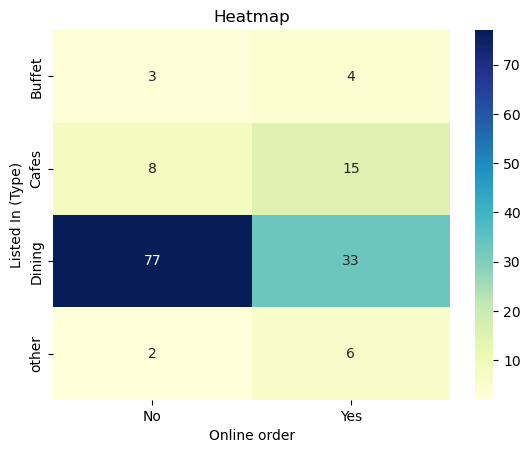

In [92]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size' , fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online order')
plt.ylabel('Listed In (Type)')
plt.show()

In [ ]:
# Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. 
# This suggests that clients prefer orders in person at restaurants but prefer online ordering at cafes.